# Diabetes Prediction with Neural Networks

**Objective**: Build and compare MLPs with/without regularization on the Pima Indians Diabetes dataset.

---

## 1. Load & Explore the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv('diabetes.csv')
print("Shape:", df.shape)
df.head()

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

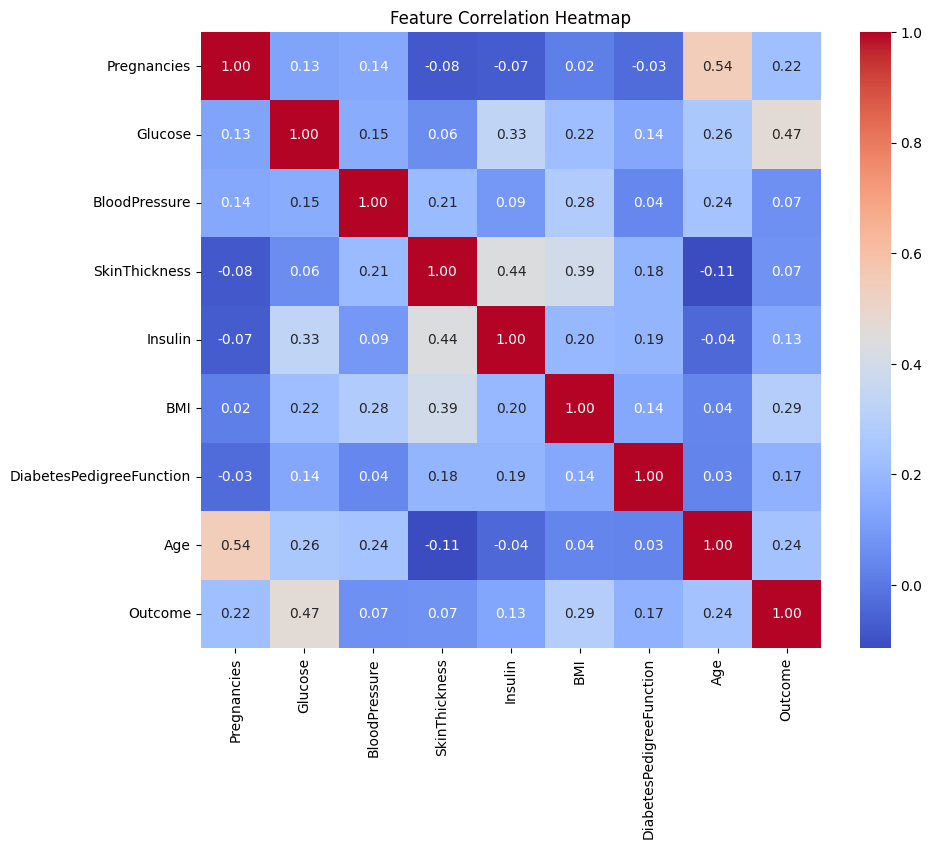

In [2]:
print("\nSummary Statistics:")
print(df.describe())

print("\nClass Distribution:")
print(df['Outcome'].value_counts())

print("\nCorrelation with Outcome:")
corr = df.corr()['Outcome'].sort_values(ascending=False)
print(corr)

if sns_available:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

## 2. Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight

X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

# Stratified split: 70% train, 15% val, 15% test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.50, stratify=y_val_test, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Class weights for imbalance
classes = np.unique(y_train)
cw = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = {int(c): w for c, w in zip(classes, cw)}

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (537, 8), Val: (115, 8), Test: (116, 8)


## 3. Callbacks

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8)

## 4. Model 1: Baseline (Small Network)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

hist1 = model1.fit(
    X_train, y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=[es, rlr],
    verbose=1
)

Epoch 1/100


C:\Users\pmait\anaconda3\envs\gym310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5549 - loss: 0.6920 - val_accuracy: 0.6783 - val_loss: 0.6827 - learning_rate: 0.0100
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.6904 - val_accuracy: 0.5652 - val_loss: 0.6845 - learning_rate: 0.0100
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4935 - loss: 0.6889 - val_accuracy: 0.5304 - val_loss: 0.6856 - learning_rate: 0.0100
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4711 - loss: 0.6877 - val_accuracy: 0.5130 - val_loss: 0.6863 - learning_rate: 0.0100
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4972 - loss: 0.6866 - val_accuracy: 0.4957 - val_loss: 0.6872 - learning_rate: 0.0100
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4562 - loss: 0.6858 - val_accuracy: 0.5130 - val_loss: 0.6876 - learning_rate: 0.0100
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4469 - loss: 0.6846 - val_accuracy: 0.50

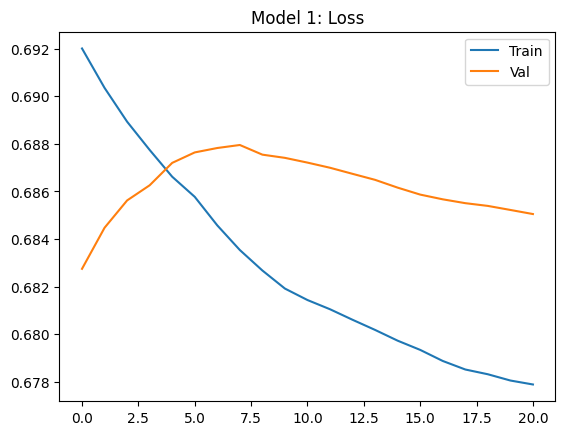

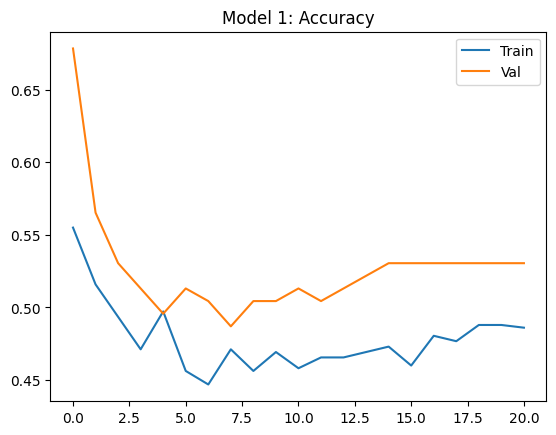

In [7]:
plt.plot(hist1.history['loss'], label='Train')
plt.plot(hist1.history['val_loss'], label='Val')
plt.title('Model 1: Loss')
plt.legend(); plt.show()

plt.plot(hist1.history['accuracy'], label='Train')
plt.plot(hist1.history['val_accuracy'], label='Val')
plt.title('Model 1: Accuracy')
plt.legend(); plt.show()

## 5. Model 2: Large Network (No Regularization)

In [8]:
model2 = Sequential([
    Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist2 = model2.fit(
    X_train, y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=[es, rlr],
    verbose=1
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5810 - loss: 0.6695 - val_accuracy: 0.5826 - val_loss: 0.6782 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6667 - loss: 0.6020 - val_accuracy: 0.6435 - val_loss: 0.6307 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6834 - loss: 0.5707 - val_accuracy: 0.6783 - val_loss: 0.6084 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6723 - loss: 0.5728 - val_accuracy: 0.7304 - val_loss: 0.4964 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7356 - loss: 0.5225 - val_accuracy: 0.6870 - val_loss: 0.6297 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6853 - loss: 0.5435 - val_accuracy: 0.7304 - val_loss: 0.5025 - learning_rate: 0.0010
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7281 - loss: 0.5267 - 

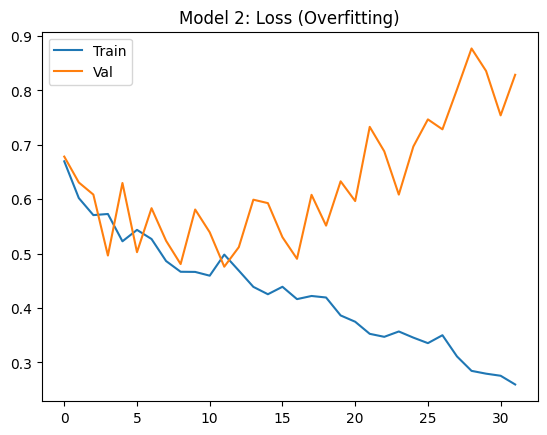

In [9]:
plt.plot(hist2.history['loss'], label='Train')
plt.plot(hist2.history['val_loss'], label='Val')
plt.title('Model 2: Loss (Overfitting)')
plt.legend(); plt.show()

## 6. Model 3: Regularized (L2 + Dropout)

In [10]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model3 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist3 = model3.fit(
    X_train, y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, y_val),
    class_weight=class_weights,
    callbacks=[es, rlr],
    verbose=1
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5903 - loss: 0.8287 - val_accuracy: 0.4261 - val_loss: 0.8206 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4786 - loss: 0.8034 - val_accuracy: 0.4087 - val_loss: 0.8078 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5270 - loss: 0.7845 - val_accuracy: 0.4957 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5233 - loss: 0.7706 - val_accuracy: 0.5478 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5866 - loss: 0.7502 - val_accuracy: 0.6348 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6406 - loss: 0.7363 - val_accuracy: 0.6522 - val_loss: 0.7338 - learning_rate: 0.0010
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 0.7287 - val_ac

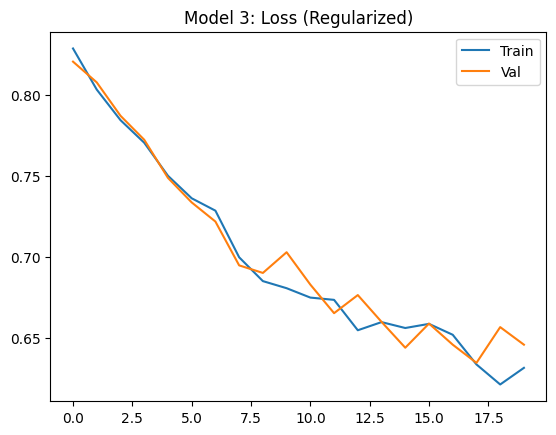

In [11]:
plt.plot(hist3.history['loss'], label='Train')
plt.plot(hist3.history['val_loss'], label='Val')
plt.title('Model 3: Loss (Regularized)')
plt.legend(); plt.show()

## 7. Evaluation Function

In [13]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_recall_curve

def evaluate(model, name):
    val_probs = model.predict(X_val).ravel()
    prec, rec, ths = precision_recall_curve(y_val, val_probs)
    # Safe F1 calculation
    f1 = np.zeros_like(prec)
    valid = (prec + rec) > 0
    f1[valid] = 2 * prec[valid] * rec[valid] / (prec[valid] + rec[valid])
    
    # Find best threshold
    if len(ths) > 0:
        best_idx = np.argmax(f1)
        best_t = ths[best_idx]
    else:
        best_t = 0.5  # fallback
        
    # Test predictions
    test_probs = model.predict(X_test).ravel()
    test_pred = (test_probs >= best_t).astype(int)

    print(f"\n{name}")
    print(f"Best Threshold: {best_t:.3f}")
    print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(y_test, test_probs):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, test_pred))
    print(classification_report(y_test, test_pred, digits=4))

evaluate(model1, "Model 1 - Baseline")
evaluate(model2, "Model 2 - Large (No Reg)")
evaluate(model3, "Model 3 - Regularized")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Model 1 - Baseline
Best Threshold: 0.500
Test Accuracy: 0.5172
Test ROC-AUC: 0.5011
Confusion Matrix:
[[37 38]
 [18 23]]
              precision    recall  f1-score   support

           0     0.6727    0.4933    0.5692        75
           1     0.3770    0.5610    0.4510        41

    accuracy                         0.5172       116
   macro avg     0.5249    0.5272    0.5101       116
weighted avg     0.5682    0.5172    0.5274       116

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Model 2 - Large (No Reg)
Best Threshold: 0.341
Test Accuracy: 0.7328
Test ROC-AUC: 0.8244
Confusion Matrix:
[[59 16]
 [15 26]]
              precision    recall  f1-score   support

           0     0.7973    0.7867    0.7919        75
           1     0.6190    0.6341    0.6265        41

    accuracy                         0.7328       116
   macro avg     0.7082    0.7104    0.7092       116

## 8. Exercise 2: Hyperparameter Tuning

In [16]:
from tensorflow.keras import Input

# Model 4a: Fewer layers (64→32)
model4a = Sequential([
    Input(shape=(X_train.shape[1],)),           # FIRST LAYER
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model4a.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4a.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val),
            class_weight=class_weights, callbacks=[es, rlr], verbose=0)

evaluate(model4a, "Model 4a - Fewer Layers (64→32)")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Model 4a - Fewer Layers (64→32)
Best Threshold: 0.466
Test Accuracy: 0.4828
Test ROC-AUC: 0.5646
Confusion Matrix:
[[23 52]
 [ 8 33]]
              precision    recall  f1-score   support

           0     0.7419    0.3067    0.4340        75
           1     0.3882    0.8049    0.5238        41

    accuracy                         0.4828       116
   macro avg     0.5651    0.5558    0.4789       116
weighted avg     0.6169    0.4828    0.4657       116



In [19]:
# Model 4b: Wider layers (512→256→128)
model4b = Sequential([
    Input(shape=(X_train.shape[1],)),   
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005)), 
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model4b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4b.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val),
            class_weight=class_weights, callbacks=[es, rlr], verbose=0)

evaluate(model4b, "Model 4b - Wider Layers (512→256→128)")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

Model 4b - Wider Layers (512→256→128)
Best Threshold: 0.529
Test Accuracy: 0.6897
Test ROC-AUC: 0.7538
Confusion Matrix:
[[56 19]
 [17 24]]
              precision    recall  f1-score   support

           0     0.7671    0.7467    0.7568        75
           1     0.5581    0.5854    0.5714        41

    accuracy                         0.6897       116
   macro avg     0.6626    0.6660    0.6641       116
weighted avg     0.6933    0.6897    0.6913       116

